In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Defino el modelo
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


<class 'module'>
Forma de imágenes de entrenamiento: 60000
Forma de etiquetas de entrenamiento: 60000


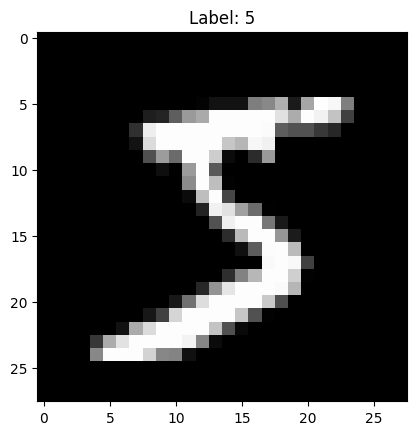

In [ ]:
# Caergo el dataset del MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(type(mnist))
print("Forma de imágenes de entrenamiento:", len(train_images))
print("Forma de etiquetas de entrenamiento:", len(train_labels))
#print("Forma de imágenes de prueba:", test_images)
#print("Forma de etiquetas de prueba:", test_labels)

#Imprimo un elemento del dataset para ver que morfologia tiene
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

In [ ]:

# Preprocesar las imagenes de entrenamiento
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0


In [ ]:

# Convierte cada etiqueta a codificacion one-hot
# cada etiqueta se convierte en un vector binario.
# En este vector, todas las posiciones están en cero,
# excepto una que corresponde a la clase de la muestra.
# La posición de esta "unidad" es 1, mientras que todas las demás son 0.
# Por ejemplo, si tienes 3 clases y una muestra pertenece a la clase 2,
# la codificación one-hot de esa etiqueta sería [0, 1, 0].

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Construyo el modelo a partir de la funcion
model = build_model()


In [ ]:

# Compilo el model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Entreno al modelo
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 49s 51ms/step - loss: 0.1846 - accuracy: 0.9427 - val_loss: 0.0555 - val_accuracy: 0.9817
Epoch 2/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0427 - val_accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0350 - val_accuracy: 0.9891
Epoch 5/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0271 - val_accuracy: 0.9915


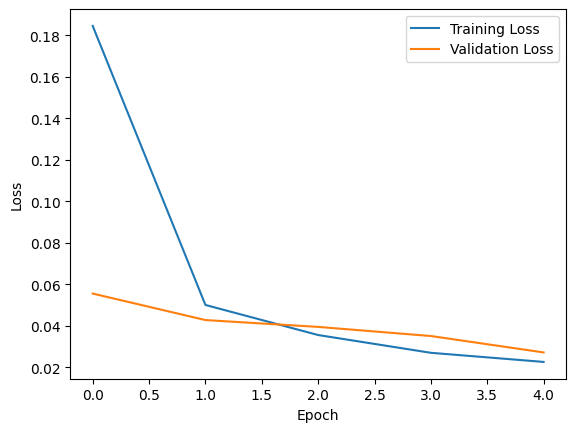

In [ ]:
# Imprimo grafico de perdida etanto en entrenamiento como validacion
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('# Epoch')
plt.ylabel('# Loss')
plt.legend()
plt.show()

In [1]:
# Imprimo grafico de precision de la red neuronal tanto en entrenamiento como en validacion
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0271 - accuracy: 0.9915
Test accuracy: 0.9915000200271606


313/313 [==============================] - 3s 8ms/step


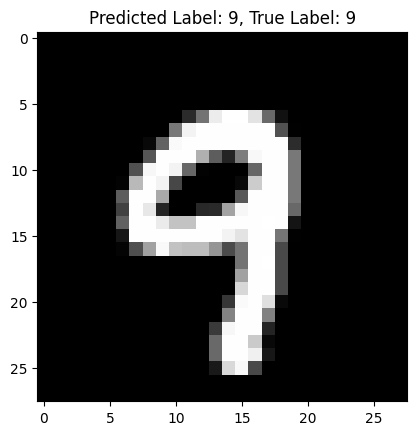

In [ ]:
import numpy as np

# Realización de la predicción para la muestra seleccionada
predictions = model.predict(test_images)
index = np.random.randint(0, len(test_images))

# Realización de la predicción para la muestra seleccionada
prediction = np.argmax(predictions[index])

# Visualización de la imagen y su etiqueta predicha
plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {prediction}, True Label: {np.argmax(test_labels[index])}')
plt.show()